In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [3]:
prop_df = pd.read_csv("prop_count.csv", index_col=0)
prop_df.fillna(0, inplace=True)
prop_df = prop_df.astype(int)
prop_df.head()

,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.6.0,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),MediaWiki/1.30.0-wmf.*,MovieGuide-wikidata/0.1,PBB_core fastrun,PetScan,Python-httplib2,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,SQID Python Helper,WikidataR - https://github.com/Ironholds/WikidataR,YTCleaner,__find_genus,__match_or_create_species,__match_taxon,automatch,auxiliary_matcher,awarder,axios,beaTunes,beacon,bot_commons,botanists,browser,coords2json,curl,fix_items,https://github.com/bearloga/WikidataQueryServiceR,...,PetScan__total,Python-httplib2__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,SQID Python Helper__total,WikidataR - https://github.com/Ironholds/WikidataR__total,YTCleaner__total,__find_genus__total,__match_or_create_species__total,__match_taxon__total,automatch__total,auxiliary_matcher__total,awarder__total,axios__total,beaTunes__total,beacon__total,bot_commons__total,botanists__total,browser__total,coords2json__total,curl__total,fix_items__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,microsync__total,misc__total,missing_wp_animal_audio__total,new_resolve_authors__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,orcidator__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,resolver__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,thorough_name_match__total,translate_items_with_property__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
P698,14939845,15752202,515,14939322,8,3103,15703193,45906,7,0,78,0,0,12,0,0,0,0,0,0,199,0,3678,0,14933216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,99,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,99,2,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,2033,0,0,0,0,0,0,0
P932,7681907,10052851,58,7681848,1,150,10052511,190,7,0,74,0,0,10,0,0,0,0,0,0,179,0,1600,0,7677869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,2099,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,2099,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,6,0,2,0,0,0,0,0,0,0
P31,5372470,21619471,124365,5243926,4179,288783,20053361,1277327,785474,31095,158908,1261,0,8,7530,62042,0,402,27848,0,8627,0,0,0,88159,16704,1,29228,196660,105520,21318,2,0,0,0,0,0,0,0,1,2,43919,0,2,0,418462,0,121,0,86,...,16704,1,29228,196660,105520,21318,2,0,0,0,0,0,0,0,1,2,43919,0,2,0,418462,0,121,0,86,122257,0,7584,0,0,3,1964,10552,3230,13,0,196322,9622,1314288,260,0,1008,1705984,1108,5,0,1,7,10,1
P279,3714980,15840789,51447,3660835,2698,112439,15422687,305663,117715,1655,10289,0,0,1,0,97,0,1563,23196,0,1226,0,13629,0,114167,331,0,10541,158831,105517,30748,0,0,0,0,0,0,19,0,1,0,22542,0,0,0,465389,0,76,0,63,...,331,0,10541,158831,105517,30748,0,0,0,0,0,0,19,0,1,0,22542,0,0,0,465389,0,76,0,63,0,10,7499,0,0,0,0,21100,1125,0,0,196322,10887,756168,52,1,757,1644043,540,0,0,0,3,0,1
P625,1237330,7305260,35462,1201069,799,213063,7063722,28475,69185,11,137540,0,0,0,0,1169,0,778520,1348,0,1737,0,82324,0,0,104,0,2207,26,0,4,0,952,0,0,0,0,0,3459,0,0,0,0,0,0,131360,27,9,0,68,...,104,0,2207,26,0,4,0,952,0,0,0,0,0,3459,0,0,0,0,0,0,131360,27,9,0,68,0,0,2675,0,0,0,0,0,0,0,0,594,3840,6299,68,0,0,14298,0,0,0,0,0,1,0


### Column Definitions
`unique: number of unique queries that contain this ID
total: number of total queries that contain this ID
organic/robotic/robotic,organic: unique queries classified using the organic/robotic from the original file
xxx___total: total counts (not unique counts)
other columns: unique counts by useragent
other columns__total: total counts by useragent`

In [4]:
prop_df['nonPBB'] = prop_df['unique'] - prop_df['PBB_core fastrun']
prop_df['nonPBB__total'] = prop_df['total'] - prop_df['PBB_core fastrun__total']

In [5]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total', 'nonPBB', 'nonPBB__total']
cols = list(set(prop_df.columns) - set(vc))
prop_df = prop_df[vc + cols]
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,GuzzleHttp,okhttp/3.4.1__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,other,images_on_wikidata_not_wikipedia__total,Magnus labs tools,C++ WikiAPI__total,Java/1.7.0,fix_items__total,orcidator,thorough_name_match,sparqlwrapper * (rdflib.github.io/sparqlwrapper),orcid_bot,SQID Python Helper__total,https://github.com/bearloga/WikidataQueryServiceR__total,python-requests__total,misc,orcidator__total,__match_or_create_species,QueryBot/0.1,fix_items,YTCleaner__total,resolver__total,new_resolve_authors,GuzzleHttp__total,update_dynamic,QueryBot/0.1__total,jgonsior-tree,awarder,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),curl,browser,jgonsior-tree__total,__match_or_create_species__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,query__total,Ruby__total,new_resolve_authors__total,bot_commons__total,Java/1.8.0,...,automatch__total,C++ WikiAPI,wdq_image_feed__total,Python-httplib2__total,Java/1.6.0,__find_genus__total,Apache-Jena-ARQ__total,awarder__total,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/)__total,Jakarta Commons-HttpClient/3.1__total,WikidataR - https://github.com/Ironholds/WikidataR,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,missing_wp_animal_audio,SQID Python Helper,resolver,-__total,microsync__total,__match_taxon__total,axios__total,testing__total,translate_items_with_property__total,MovieGuide-wikidata/0.1__total,wdq_image_feed,Java/1.7.0__total,MovieGuide-wikidata/0.1,coords2json,other__total,bot_commons,axios,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Apache-HttpClient,Java/1.6.0__total,query,WikidataR - https://github.com/Ironholds/WikidataR__total,coords2json__total,botanists__total,-,https://github.com/bearloga/WikidataQueryServiceR,Asparagus/Asparagus 0.1__total,Ruby,Apache-HttpClient__total,rest-client2.0.* (*) ruby/*__total,PetScan__total,curl__total,botanists,taxon_matcher__total,misc__total,orcid_bot__total,okhttp/3.4.1,Apache-Jena-ARQ
P698,14939845,15752202,515,3103,14939322,15703193,14933216,14933216,6629,818986,0,0,0,2,0,199,12,0,99,0,0,2033,0,0,2,4,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,523,0,0,0,0,0,0,0,0,...,0,12,0,0,0,0,78,0,0,0,0,2033,0,0,0,7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,78
P932,7681907,10052851,58,150,7681848,10052511,7677869,7677869,4038,2374982,0,0,0,2,0,179,10,0,2099,0,0,2,0,0,0,2,0,0,0,0,2099,0,6,0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,74,0,0,0,0,2,0,0,6,7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,74
P31,5372470,21619471,124365,288783,5243926,20053361,88159,88159,5284311,21531312,7530,3230,7584,9622,122257,8627,8,402,0,0,0,1705984,13,2,86,1314288,0,0,0,105520,0,0,0,1964,7530,7,105520,0,1,196322,121,418462,0,0,10552,260,21318,1964,2,27848,...,0,8,1,1,0,0,158908,1,0,62042,0,1705984,3,2,0,785474,0,0,2,5,1,0,1,402,0,0,9622,2,2,10552,31095,0,260,0,0,0,785474,86,1261,21318,31095,1008,16704,121,0,1108,0,13,3230,158908
P279,3714980,15840789,51447,112439,3660835,15422687,114167,114167,3600813,15726622,0,1125,7499,10887,0,1226,1,1563,0,0,0,1644043,0,0,63,756168,0,0,0,105517,0,0,1,0,0,3,105517,10,1,196322,76,465389,10,0,21100,52,30748,0,0,23196,...,19,1,1,0,0,0,10289,1,0,97,0,1644043,0,0,1,117715,0,0,0,0,0,0,1,1563,0,0,10887,0,0,21100,1655,0,52,0,0,0,117715,63,0,30748,1655,757,331,76,0,540,0,0,1125,10289
P625,1237330,7305260,35462,213063,1201069,7063722,0,0,1237330,7305260,0,0,2675,3840,0,1737,0,778520,0,0,0,14298,0,0,68,6299,0,0,0,0,0,0,0,0,0,0,0,0,0,594,9,131360,0,0,0,68,4,0,0,1348,...,0,0,0,0,0,0,137540,0,0,1169,952,14298,0,0,0,69185,0,0,0,0,0,0,0,778520,0,27,3840,0,0,0,11,0,68,952,27,0,69185,68,0,4,11,0,104,9,0,0,0,0,0,137540


In [6]:
query = """
SELECT ?prop ?propLabel WHERE {
?prop wikibase:propertyType ?pt .
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
prop_label_df = wdi_core.WDItemEngine.execute_sparql_query(query, as_dataframe=True)
prop_label_df.prop = prop_label_df.prop.str.replace("http://www.wikidata.org/entity/", "")
prop_label = dict(zip(prop_label_df.prop, prop_label_df.propLabel))

In [7]:
prop_df.index = prop_df.index.map(prop_label.get)
prop_df = prop_df.iloc[prop_df.index.notnull(),:]
prop_df.head(5)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,GuzzleHttp,okhttp/3.4.1__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,other,images_on_wikidata_not_wikipedia__total,Magnus labs tools,C++ WikiAPI__total,Java/1.7.0,fix_items__total,orcidator,thorough_name_match,sparqlwrapper * (rdflib.github.io/sparqlwrapper),orcid_bot,SQID Python Helper__total,https://github.com/bearloga/WikidataQueryServiceR__total,python-requests__total,misc,orcidator__total,__match_or_create_species,QueryBot/0.1,fix_items,YTCleaner__total,resolver__total,new_resolve_authors,GuzzleHttp__total,update_dynamic,QueryBot/0.1__total,jgonsior-tree,awarder,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),curl,browser,jgonsior-tree__total,__match_or_create_species__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,query__total,Ruby__total,new_resolve_authors__total,bot_commons__total,Java/1.8.0,...,automatch__total,C++ WikiAPI,wdq_image_feed__total,Python-httplib2__total,Java/1.6.0,__find_genus__total,Apache-Jena-ARQ__total,awarder__total,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/)__total,Jakarta Commons-HttpClient/3.1__total,WikidataR - https://github.com/Ironholds/WikidataR,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,missing_wp_animal_audio,SQID Python Helper,resolver,-__total,microsync__total,__match_taxon__total,axios__total,testing__total,translate_items_with_property__total,MovieGuide-wikidata/0.1__total,wdq_image_feed,Java/1.7.0__total,MovieGuide-wikidata/0.1,coords2json,other__total,bot_commons,axios,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Apache-HttpClient,Java/1.6.0__total,query,WikidataR - https://github.com/Ironholds/WikidataR__total,coords2json__total,botanists__total,-,https://github.com/bearloga/WikidataQueryServiceR,Asparagus/Asparagus 0.1__total,Ruby,Apache-HttpClient__total,rest-client2.0.* (*) ruby/*__total,PetScan__total,curl__total,botanists,taxon_matcher__total,misc__total,orcid_bot__total,okhttp/3.4.1,Apache-Jena-ARQ
PubMed ID,14939845,15752202,515,3103,14939322,15703193,14933216,14933216,6629,818986,0,0,0,2,0,199,12,0,99,0,0,2033,0,0,2,4,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,523,0,0,0,0,0,0,0,0,...,0,12,0,0,0,0,78,0,0,0,0,2033,0,0,0,7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,78
PMCID,7681907,10052851,58,150,7681848,10052511,7677869,7677869,4038,2374982,0,0,0,2,0,179,10,0,2099,0,0,2,0,0,0,2,0,0,0,0,2099,0,6,0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,74,0,0,0,0,2,0,0,6,7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,74
instance of,5372470,21619471,124365,288783,5243926,20053361,88159,88159,5284311,21531312,7530,3230,7584,9622,122257,8627,8,402,0,0,0,1705984,13,2,86,1314288,0,0,0,105520,0,0,0,1964,7530,7,105520,0,1,196322,121,418462,0,0,10552,260,21318,1964,2,27848,...,0,8,1,1,0,0,158908,1,0,62042,0,1705984,3,2,0,785474,0,0,2,5,1,0,1,402,0,0,9622,2,2,10552,31095,0,260,0,0,0,785474,86,1261,21318,31095,1008,16704,121,0,1108,0,13,3230,158908
subclass of,3714980,15840789,51447,112439,3660835,15422687,114167,114167,3600813,15726622,0,1125,7499,10887,0,1226,1,1563,0,0,0,1644043,0,0,63,756168,0,0,0,105517,0,0,1,0,0,3,105517,10,1,196322,76,465389,10,0,21100,52,30748,0,0,23196,...,19,1,1,0,0,0,10289,1,0,97,0,1644043,0,0,1,117715,0,0,0,0,0,0,1,1563,0,0,10887,0,0,21100,1655,0,52,0,0,0,117715,63,0,30748,1655,757,331,76,0,540,0,0,1125,10289
coordinate location,1237330,7305260,35462,213063,1201069,7063722,0,0,1237330,7305260,0,0,2675,3840,0,1737,0,778520,0,0,0,14298,0,0,68,6299,0,0,0,0,0,0,0,0,0,0,0,0,0,594,9,131360,0,0,0,68,4,0,0,1348,...,0,0,0,0,0,0,137540,0,0,1169,952,14298,0,0,0,69185,0,0,0,0,0,0,0,778520,0,27,3840,0,0,0,11,0,68,952,27,0,69185,68,0,4,11,0,104,9,0,0,0,0,0,137540


In [8]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


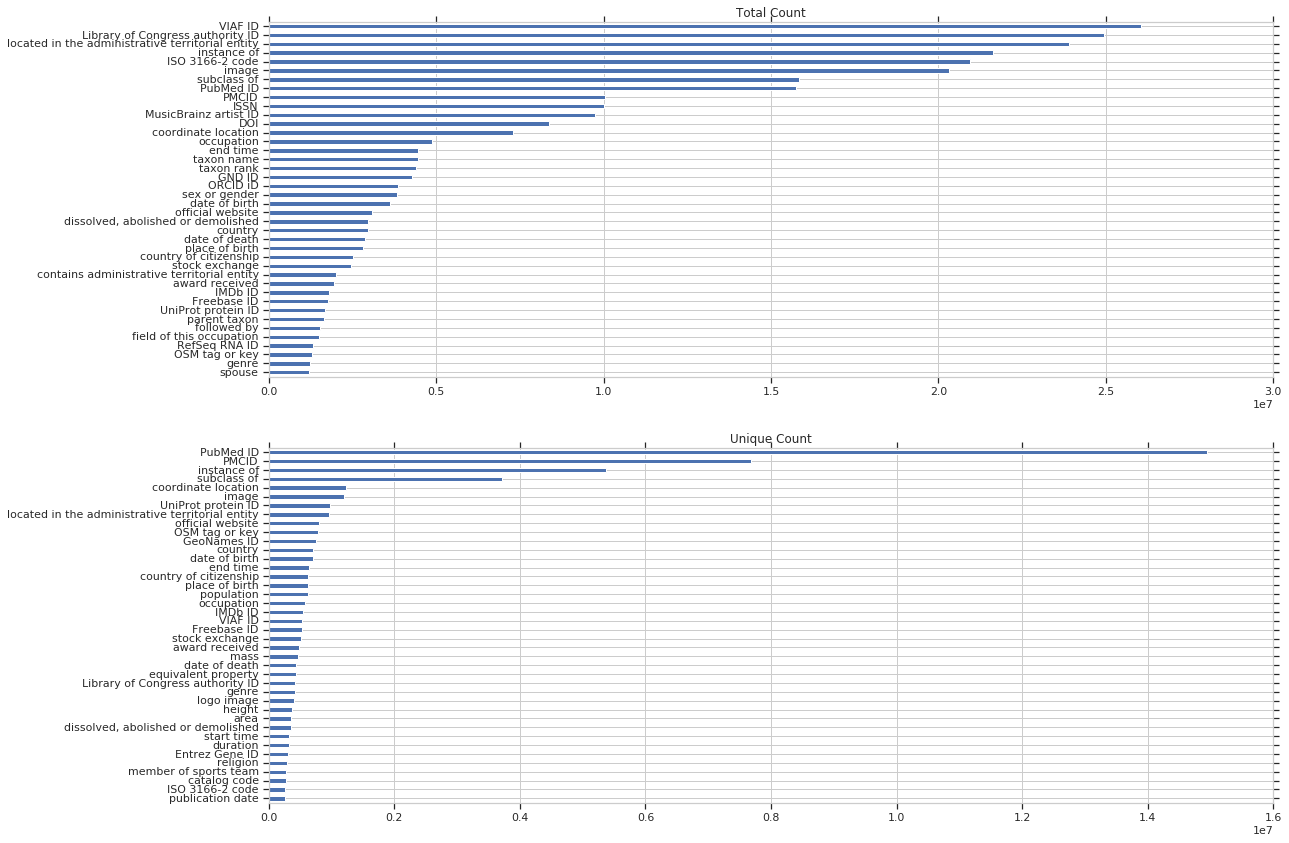

In [9]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("total")[-40:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("unique")[-40:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

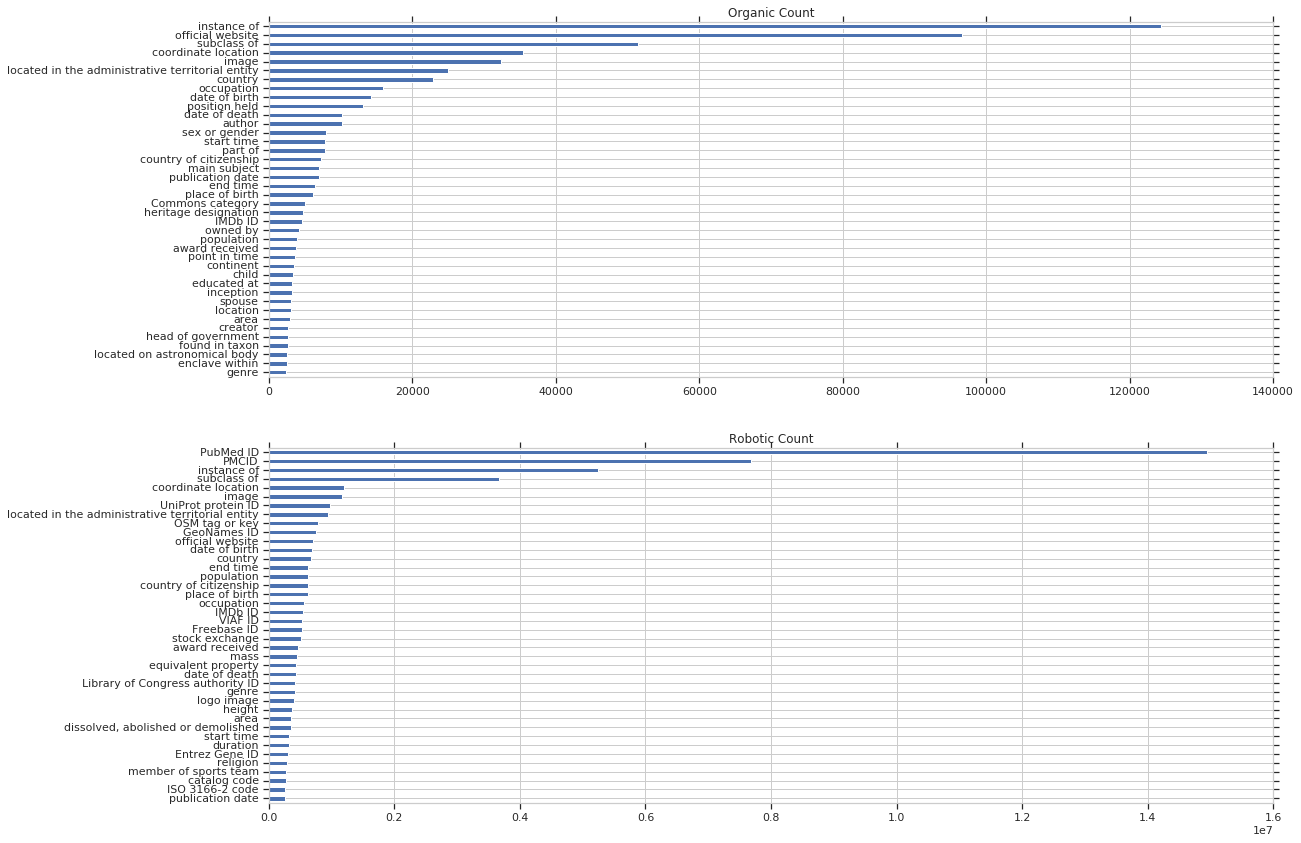

In [10]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("organic")[-40:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("robotic")[-40:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [11]:
ua_cols = set(prop_df.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

In [12]:
# most used props by useragents
ua_prop_df = prop_df.loc[:,ua_cols].apply(lambda x:np.log10(x+1))
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:10].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:10].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:10].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:10].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


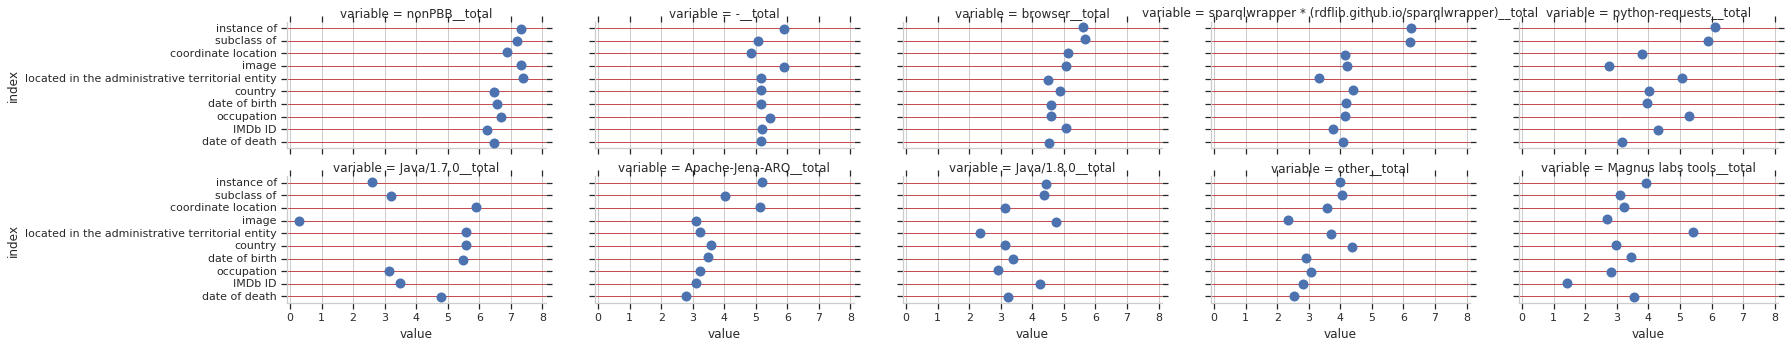

In [13]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=5, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8.1))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


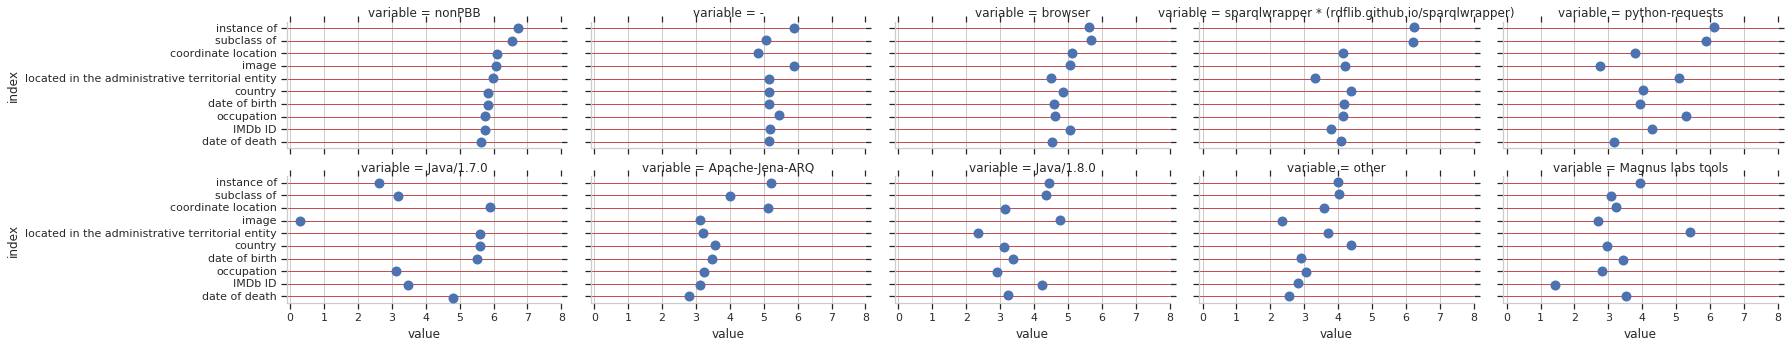

In [14]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=5, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

In [15]:
# biomedical properties
PROPS = {'P685', 'P4196', 'P698', 'P659', 'P686', 'P702', 'P231', 'P4229', 'P1057', 'P3841', 'P1748', 'P932',  'P4271', 'P594', 'P1310', 'P813',
               'P2868', 'P639', 'P3357', 'P3870', 'P595', 'P234','P645', 'P3331', 'P5270', 'P356', 'P2249', 'P592', 'P3329', 'P274', 'P927', 'P688', 
              'P637', 'P652', 'P4168', 'P4317', 'P2926', 'P684', 'P225', 'P3359', 'P3358', 'P267', 'P1692', 'P233', 'P715', 'P2394', 'P3356', 'P2115', 'P492', 'P2548', 
              'P3860', 'P2871', 'P1065', 'P671', 'P636', 'P1550', 'P1640', 'P3354', 'P3094',  'P494', 'P352', 'P2646', 'P3986', 'P353', 'P2393', 'P2017', 'P2293', 
              'P780', 'P3406', 'P682', 'P1709', 'P661', 'P662', 'P486', 'P1395', 'P351', 'P235', 'P2870', 'P593', 'P2175', 'P354', 'P1554', 'P3355', 'P828', 'P644', 
              'P705', 'P704', 'P683', 'P638', 'P657', 'P591', 'P3853', 'P681', 'P3433', 'P703', 'P171', 'P493', 'P665', 'P3852', 'P699', 'P459', 'P2892', 'P672', 
              'P128', 'P680'}
PROPS = list(map(prop_label.get, PROPS))
bm_prop_df = prop_df.reindex(PROPS).sort_values("nonPBB", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all").astype(int)

In [16]:
total = bm_prop_df.sum(axis=0)
cols = bm_prop_df.columns[total>10000]
bm_prop_df = bm_prop_df[cols]
bm_prop_df.to_csv("bm_prop_df.csv")
bm_prop_df

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,browser,MediaWiki/1.30.0-wmf.*,"robotic,organic__total",MediaWiki/1.30.0-wmf.*__total,browser__total,Apache-Jena-ARQ__total,-__total,Apache-HttpClient,-,Apache-HttpClient__total,Apache-Jena-ARQ
taxon name,44493,4451126,684,2772,43804,4446417,0,0,44493,4451126,689,4504,1937,4504,689,2251,35141,0,35141,0,2251
DOI,14115,8369207,134,281,13967,4706111,277,277,13838,8368930,202,5330,3662815,5330,202,104,9,0,9,0,104
PubChem CID,9323,13311,100,300,9220,12996,21,21,9302,13290,103,1746,15,1746,103,7323,8,0,8,0,7323
genomic start,8948,27351,1029,9448,7909,17543,51,51,8897,27300,1039,528,360,528,1039,321,7,6943,7,6943,321
ICD-10,8694,13114,246,338,8447,12767,5,5,8689,13109,247,2180,9,2180,247,6157,8,0,8,0,6157
MeSH ID,13865,19583,281,316,13579,19240,5319,5319,8546,14264,288,1998,27,1998,288,6178,8,0,8,0,6178
genomic end,8516,22868,643,5450,7867,17229,51,51,8465,22817,649,528,189,528,649,321,7,6942,7,6942,321
ICD-9,7998,12234,152,255,7846,11979,5,5,7993,12229,152,1586,0,1586,152,6134,6,0,6,0,6134
OMIM ID,7997,11643,11,30,7985,11604,911,911,7086,10732,12,848,9,848,12,6124,8,0,8,0,6124
found in taxon,34024,253200,2643,9012,31313,240229,27344,27344,6680,225856,2836,0,3959,0,2836,226,8,3386,8,3386,226


In [17]:
bm_prop_df_log = bm_prop_df.apply(lambda x:np.log10(x+1))

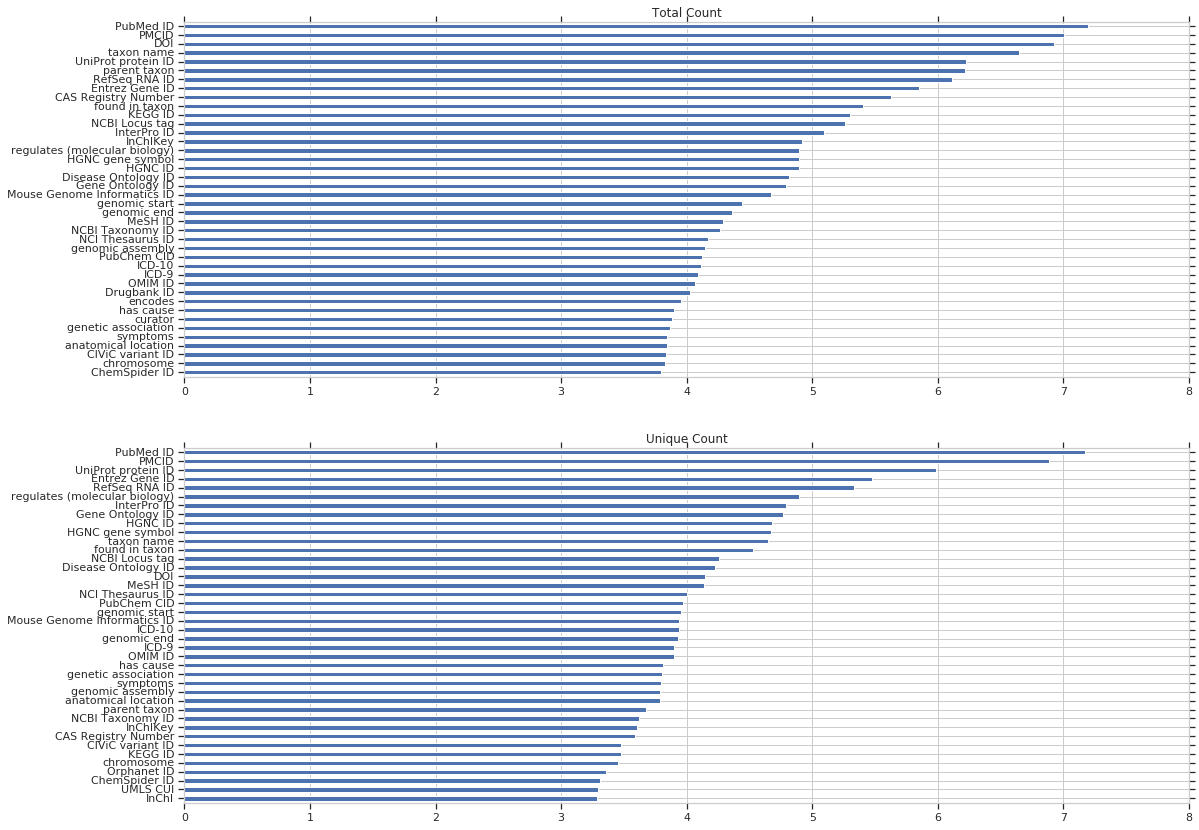

In [18]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("total")[-40:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("unique")[-40:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

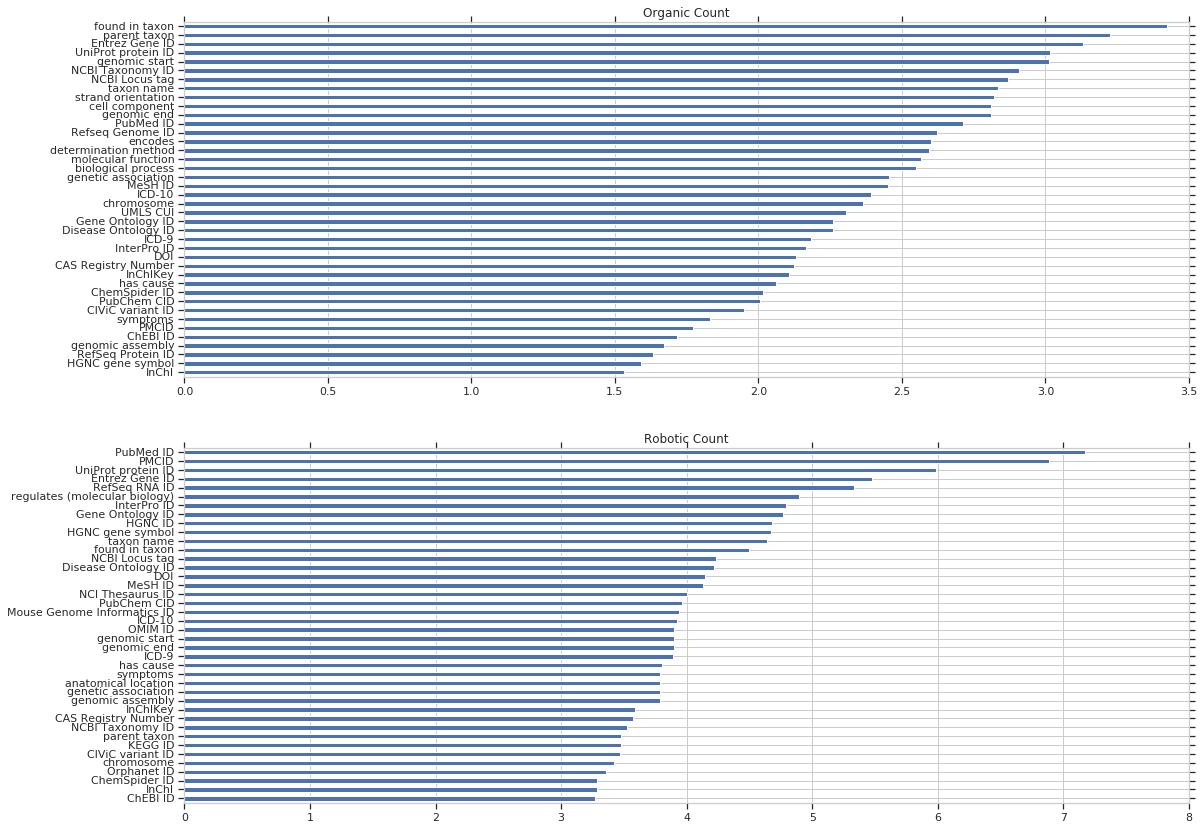

In [19]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("organic")[-40:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("robotic")[-40:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [20]:
ua_cols = set(bm_prop_df_log.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

ua_prop_df = bm_prop_df_log.loc[:,ua_cols]
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:20].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:20].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:10].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:10].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


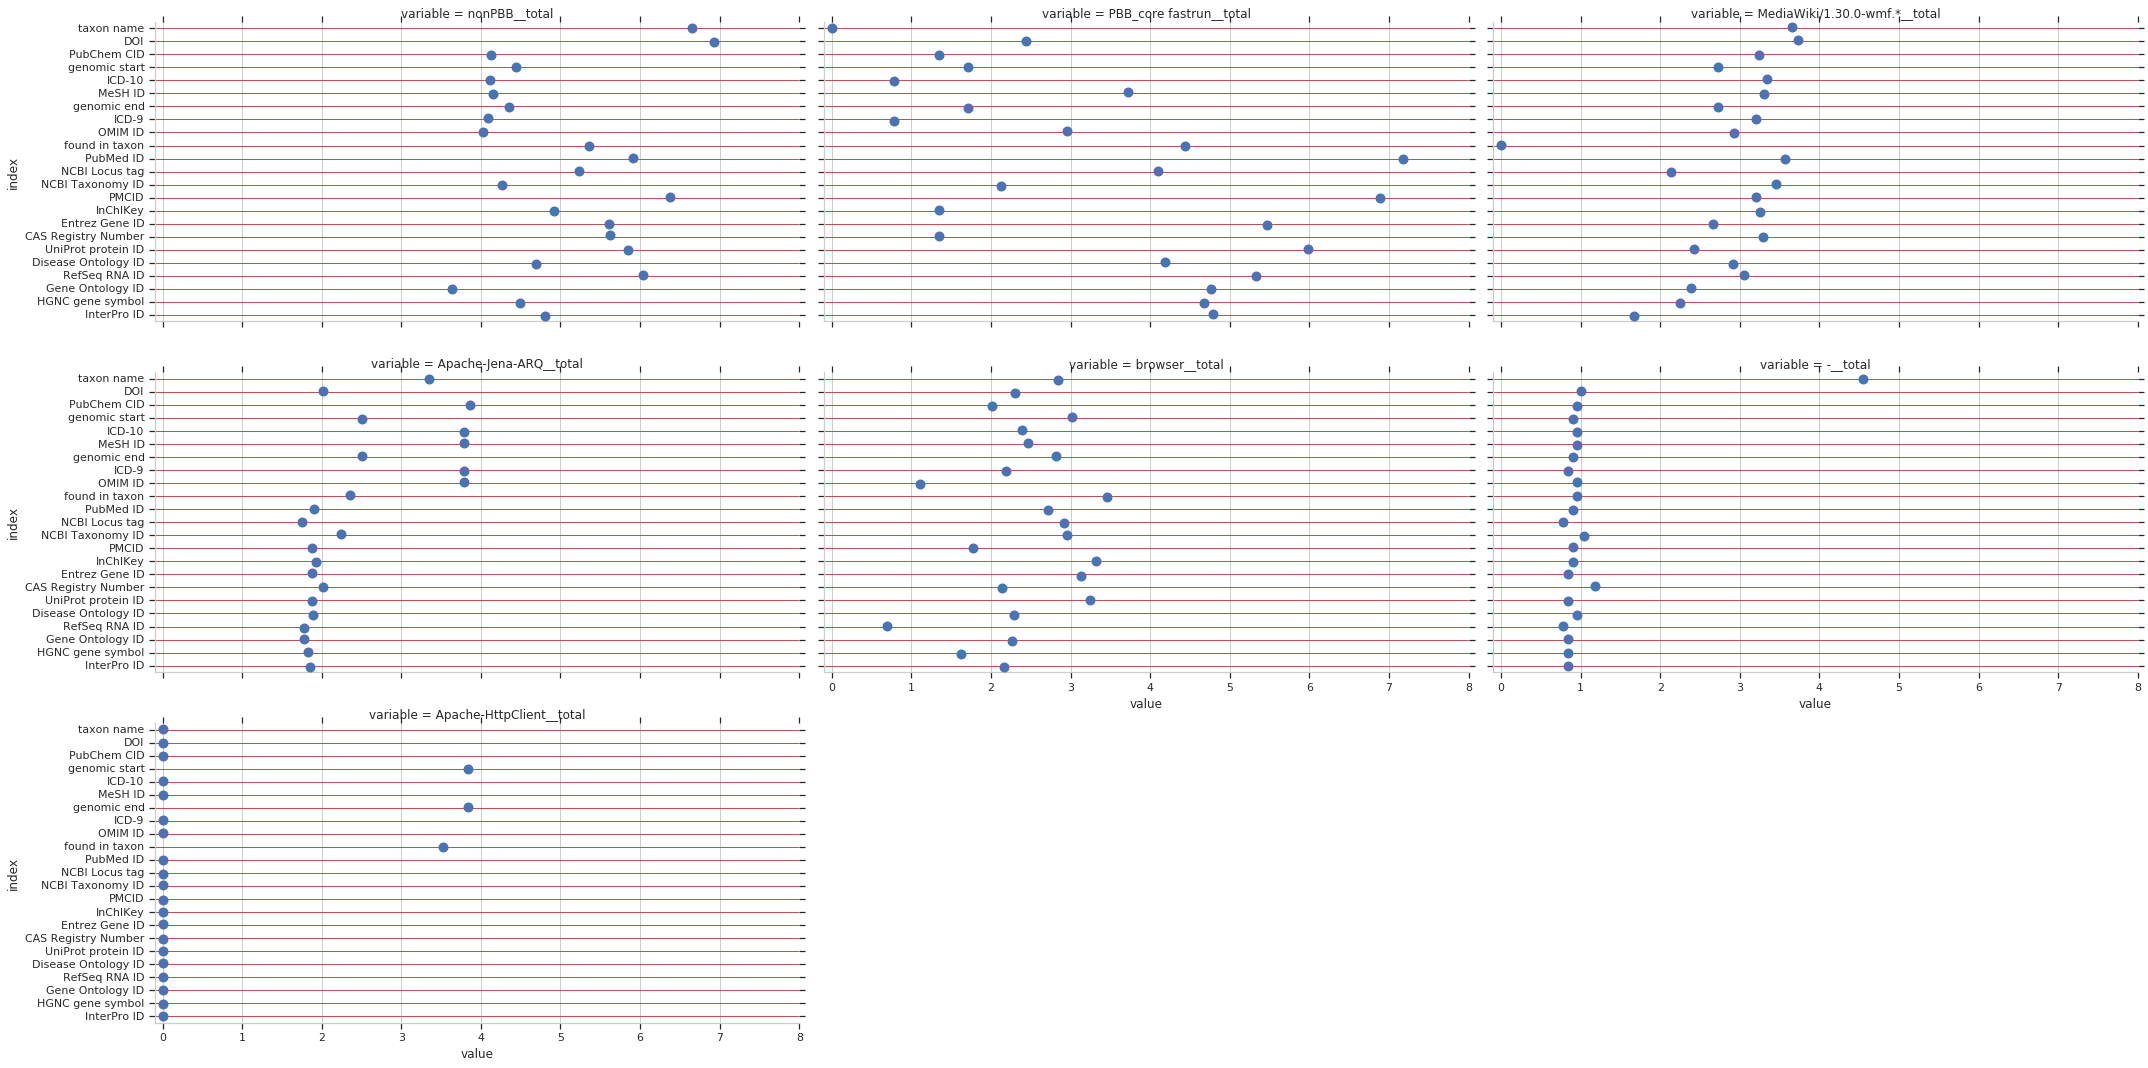

In [21]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


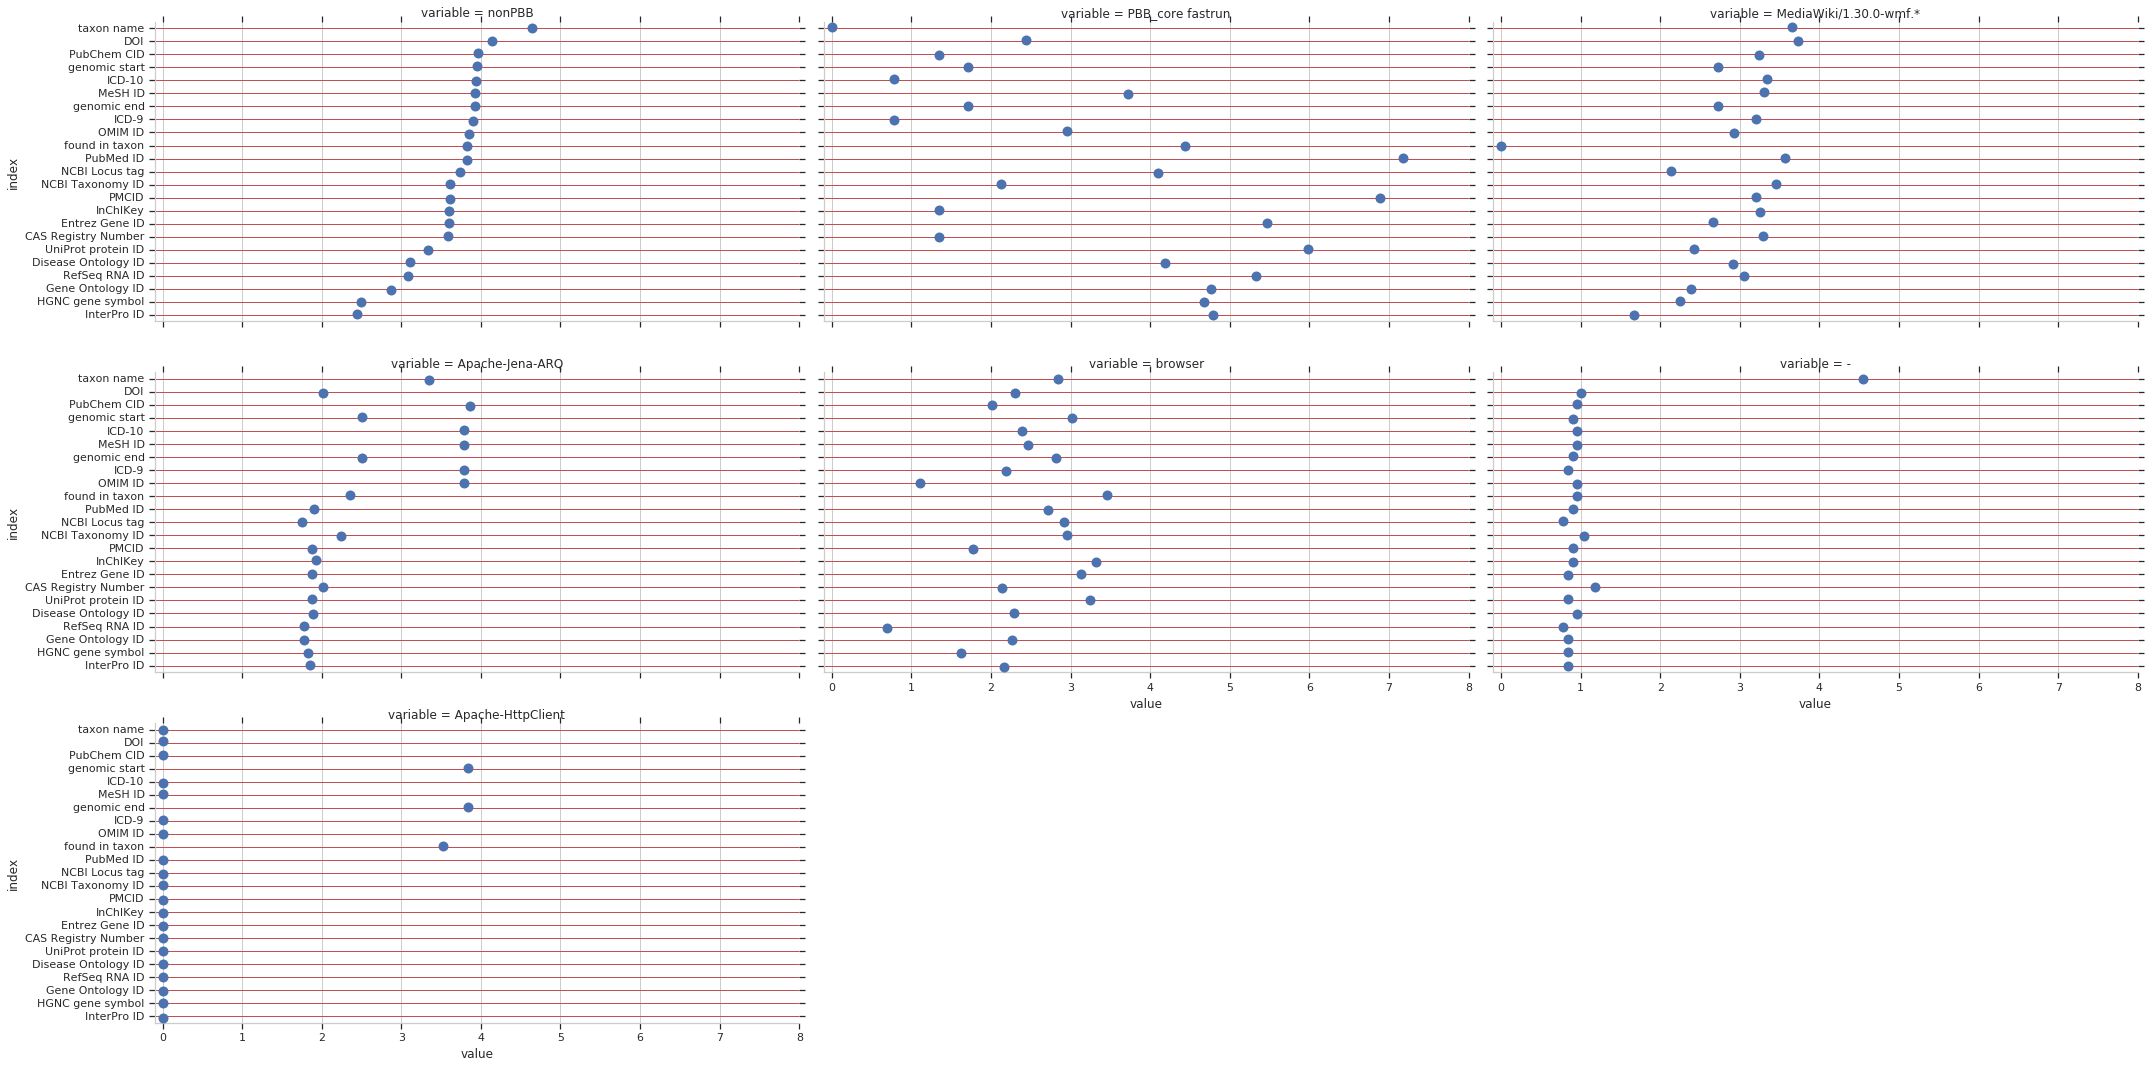

In [22]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(-0.1, 8))
for ax in g.axes:
    ax.grid(color='r', linestyle='-', linewidth=1, axis='y')

In [23]:
### explore some queries: Pubmed ID
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P698 | head -n100

2838649it [00:53, 53208.57it/s]Describe	 <http://www.wikidata.org/entity/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/reference/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/statement/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000001".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "1000000".	}	 robotic PBB_core fastrun 2
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000002".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P698> / <http://www.wikidata.org/prop/statement/P698> ) "10000003".	}	 robotic PBB_core fastrun 1
SELECT *	W


gzip: stdout: Broken pipe


In [24]:
### explore some queries: Pubmed ID without pbb
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P698 | grep -v "PBB_core" | head -n100

18771806it [04:35, 68038.71it/s]Describe	 <http://www.wikidata.org/entity/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/reference/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
Describe	 <http://www.wikidata.org/prop/statement/P698>  robotic sparqlwrapper * (rdflib.github.io/sparqlwrapper) 1
SELECT *	WHERE {	  ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://www.wikidata.org/prop/novalue/P698> .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "statement" ) ) ) 	) .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "reference" ) ) ) 	) .	}	 robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P2410>  ?var2 ;	 <http://www.wikidata.org/prop/direct/P2860>  ?var3 .	  ?var4  <http://www.wikidata.org/prop/direct/P3937>  ?var5 ;	 <http://www.wikidata.org/prop/direct/P2860>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P698>  ?var6 .	}	 organic browser 1
SELECT 


gzip: stdout: Broken pipe


In [25]:
### explore some queries: Disease ontology ID
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P699 | head -n100

7694706it [02:01, 63176.21it/s]Describe	 <http://www.wikidata.org/entity/P699>  robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}	 organic browser 1
SELECT *	WHERE {	  <http://www.wikidata.org/prop/direct/P699>  ?var1  ?var2 .	}	 organic browser 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10003".	}	 robotic PBB_core fastrun 3
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10016".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10017".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wikidata.org/prop/P699> / <http://www.wikidata.org/prop/statement/P699> ) "DOID:10020".	}	 robotic PBB_core fastrun 1
SELECT *	WHERE {	  ?var1 ( <http://www.wiki

Traceback (most recent call last):
  File "look_for_queries.py", line 20, in <module>
    print(query, sourceCategory, user_agents, count)
BrokenPipeError: [Errno 32] Broken pipe

gzip: stdout: Broken pipe


In [26]:
### explore some queries: Disease ontology ID without pbb
!zcat data/2017-678_uniq.tsv.gz | python3 look_for_queries.py P699 | grep -v "PBB_core" | head -n100

18772448it [04:11, 74606.51it/s]Describe	 <http://www.wikidata.org/entity/P699>  robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}	 organic browser 1
SELECT *	WHERE {	  <http://www.wikidata.org/prop/direct/P699>  ?var1  ?var2 .	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://www.wikidata.org/prop/novalue/P699> .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "statement" ) ) ) 	) .	 FILTER (  ( !( CONTAINS (  STR (  ?var1  ) , "reference" ) ) ) 	) .	}	 robotic Apache-Jena-ARQ 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P31>  <http://www.wikidata.org/entity/P699> .	}	 organic browser 2
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  "DOID:14566".	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  "DOID:150".	}	 organic browser 1
SELECT *	WHERE {	  ?var1  <http://www.wiki

20779613it [05:09, 67246.37it/s]r2  )	WHERE {	 SELECT DISTINCT ?var1  ?var3 	 WHERE  {	   ?var1  <http://www.wikidata.org/prop/statement/P699>  ?var3 .	   ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var4 .	   ?var3  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var5 .	 }	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )	WHERE {	 SELECT DISTINCT ?var1  ?var3 	 WHERE  {	   ?var1  <http://www.wikidata.org/prop/statement/P699>  ?var3 .	   ?var1  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?var4 .	 FILTER (   (  isLITERAL (  ?var3  )  ) 	) .	 }	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )( COUNT ( DISTINCT  ?var1  ) AS  ?var3  )( COUNT ( DISTINCT  ?var4  ) AS  ?var5  )	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var4 .	}	 robotic Apache-Jena-ARQ 1
SELECT( COUNT ( ?var1  ) AS  ?var2  )( COUNT ( DISTINCT  ?var1  ) AS  ?var3  )( COUNT ( DISTINCT  ?var4  ) AS  ?var5  )	WHERE {	  ?var1  <http://www.wikidata.org/

21509144it [05:22, 66725.45it/s] ) AS  ?var2  )( COUNT ( ?var1  ) AS  ?var3  )	WHERE {	 SELECT DIS^CTraceback (most recent call last):
  File "look_for_queries.py", line 17, in <module>
    query = unquote_plus(query).replace("\n", "\t")
  File "/usr/lib/python3.5/urllib/parse.py", line 639, in unquote_plus
    return unquote(string, encoding, errors)
  File "/usr/lib/python3.5/urllib/parse.py", line 548, in unquote
    append(unquote_to_bytes(bits[i]).decode(encoding, errors))
  File "/usr/lib/python3.5/urllib/parse.py", line 518, in unquote_to_bytes
    append(_hextobyte[item[:2]])
KeyboardInterrupt

